In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df['InvoiceDate']=df['InvoiceDate'].astype(str)
df['Invoice_Year']= (df['InvoiceDate'].str.split(' ').str[0]).str.split('-').str[0]
df['Invoice_Month']= (df['InvoiceDate'].str.split(' ').str[0]).str.split('-').str[1]
df['Invoice_Day']= (df['InvoiceDate'].str.split(' ').str[0]).str.split('-').str[2]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01


In [5]:
df.drop('InvoiceDate', axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,01
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,01


In [6]:
df.groupby(['Invoice_Year', 'Invoice_Month']).size()

Invoice_Year  Invoice_Month
2010          12               42481
2011          01               35147
              02               27707
              03               36748
              04               29916
              05               37030
              06               36874
              07               39518
              08               35284
              09               50226
              10               60742
              11               84711
              12               25525
dtype: int64

### Observation 01 and 02
- In Year 2010, Only in 12th month sales are made.
- In Year 2011, Maximum sales was achieved in 11th Month.

In [7]:
Description_index= df['Description'].value_counts().index
Description_value= df['Description'].value_counts().values
Description_value[:70]

array([2369, 2200, 2159, 1727, 1638, 1501, 1473, 1385, 1350, 1280, 1252,
       1251, 1237, 1229, 1214, 1210, 1202, 1197, 1192, 1182, 1180, 1172,
       1139, 1138, 1137, 1129, 1111, 1107, 1085, 1084, 1072, 1068, 1061,
       1051, 1024, 1015, 1009,  999,  988,  986,  974,  967,  961,  960,
        944,  937,  936,  930,  924,  919,  911,  896,  895,  889,  885,
        881,  878,  875,  874,  871,  870,  865,  858,  850,  850,  829,
        813,  812,  810,  806], dtype=int64)

In [8]:
Description_index[:70]

Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT',
       'ASSORTED COLOUR BIRD ORNAMENT', 'SET OF 3 CAKE TINS PANTRY DESIGN ',
       'PACK OF 72 RETROSPOT CAKE CASES', 'LUNCH BAG  BLACK SKULL.',
       'NATURAL SLATE HEART CHALKBOARD ', 'POSTAGE', 'JUMBO BAG PINK POLKADOT',
       'HEART OF WICKER SMALL', 'JAM MAKING SET WITH JARS',
       'JUMBO STORAGE BAG SUKI', 'PAPER CHAIN KIT 50'S CHRISTMAS ',
       'JUMBO SHOPPER VINTAGE RED PAISLEY', 'LUNCH BAG CARS BLUE',
       'LUNCH BAG SPACEBOY DESIGN ', 'JAM MAKING SET PRINTED',
       'RECIPE BOX PANTRY YELLOW DESIGN', 'SPOTTY BUNTING',
       'LUNCH BAG SUKI DESIGN ', 'ROSES REGENCY TEACUP AND SAUCER ',
       'LUNCH BAG PINK POLKADOT', 'WOODEN PICTURE FRAME WHITE FINISH',
       'SET OF 4 PANTRY JELLY MOULDS', 'ALARM CLOCK BAKELIKE RED ',
       'GREEN REGENCY TEACUP AND SAUCER', 'LUNCH BAG APPLE DESIGN',
       'VICTORIAN GLASS HANGI

In [9]:
Description_index[-10:]

Index(['BAROQUE BUTTERFLY EARRINGS RED', 'ORANGE/FUSCHIA STONES NECKLACE',
       'MARIE ANTOIENETT TRINKET BOX GOLD', 'Display',
       'BLACKCHRISTMAS TREE 30CM', 'Missing',
       'historic computer difference?....se', 'DUSTY PINK CHRISTMAS TREE 30CM',
       'WRAP BLUE RUSSIAN FOLKART', 'PINK BERTIE MOBILE PHONE CHARM'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x2ab31b262e0>,
 [Text(1.081506518383689, 0.20085728937131414, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(0.9447307042651876, 0.5634570936802579, 'REGENCY CAKESTAND 3 TIER'),
  Text(0.7045376328340752, 0.8447643008085499, 'JUMBO BAG RED RETROSPOT'),
  Text(0.4221921321187173, 1.0157528260246445, 'PARTY BUNTING'),
  Text(0.14596655398635638, 1.0902723352985475, 'LUNCH BAG RED RETROSPOT'),
  Text(-0.12100013828837537, 1.0933247305966303, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(-0.3676094853785533, 1.036756126704692, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(-0.5864260303400741, 0.930647361216687, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(-0.7691177945904031, 0.7864208911545996, 'LUNCH BAG  BLACK SKULL.'),
  Text(-0.9124019671872885, 0.6144287186263077, 'NATURAL SLATE HEART CHALKBOARD '),
  Text(-1.014702481744154, 0.4247103407526774, 'POSTAGE'),
  Text(-1.077548770223771, 0.2211077741492581, 'JUMBO BAG PINK POLKADOT'),
  Text(-1.099950006012198, 0.0

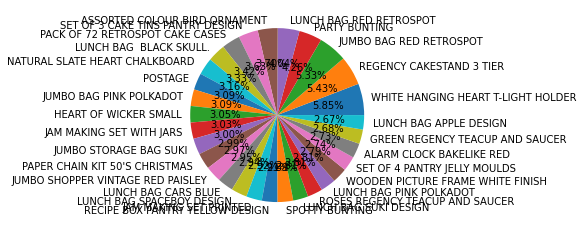

In [10]:
# Pie Chart for top 30 Description of Products
plt.pie( Description_value[:30], labels= Description_index[:30],autopct='%1.2f%%')

### Observation 03
'WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER' and 'JUMBO BAG RED RETROSPOT' are the top 3 selling products.

 'DUSTY PINK CHRISTMAS TREE 30CM','WRAP BLUE RUSSIAN FOLKART' and 'PINK BERTIE MOBILE PHONE CHARM' are the 3 worst selling products.

In [11]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [12]:
Country_value= df['Country'].value_counts().values
Country_index= df['Country'].value_counts().index

([<matplotlib.patches.Wedge at 0x2ab32916370>,
 [Text(-1.0603902707085326, 0.2925277316540858, 'United Kingdom'),
  Text(0.974012381670748, -0.5111749997330437, 'Germany'),
  Text(1.0220815558291716, -0.40663164317822126, 'France'),
  Text(1.0566955746081224, -0.30560507620720273, 'EIRE'),
  Text(1.0736482604683197, -0.23933117806368545, 'Spain'),
  Text(1.0800176231006957, -0.20871495823712283, 'Netherlands'),
  Text(1.085031568977629, -0.18084936914997687, 'Belgium'),
  Text(1.0889971785971089, -0.15519389487842825, 'Switzerland'),
  Text(1.0919379438981924, -0.1329342945796459, 'Portugal'),
  Text(1.0939371313909347, -0.11533235696964261, 'Australia'),
  Text(1.095403894637273, -0.1004505232116487, 'Norway'),
  Text(1.0964382279004303, -0.08844892536692758, 'Italy'),
  Text(1.0971937432685366, -0.07852317958652065, 'Channel Islands'),
  Text(1.0978162451488795, -0.0692783652175442, 'Finland'),
  Text(1.0983131831148913, -0.06089459578677896, 'Cyprus'),
  Text(1.0986741698298956, -0.

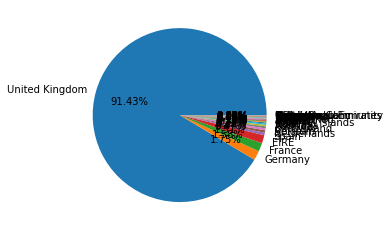

In [13]:
# Pie Chart of all the Country with their value count.
plt.pie( Country_value, labels= Country_index,autopct='%1.2f%%')

### Observation 04
United Kingdom is the highest selling country with 91.43% sales and Saudi Arabia is the country with the least sales of 10.

In [14]:
df['Bill']= df['Quantity']*df['UnitPrice']
df.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Bill
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011,12,09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,12,09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,12,09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011,12,09,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,2011,12,09,14.85


In [15]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [16]:
Customer_index= list(df['CustomerID'].value_counts().index)
Customer_index

[17841.0,
 14911.0,
 14096.0,
 12748.0,
 14606.0,
 15311.0,
 14646.0,
 13089.0,
 13263.0,
 14298.0,
 15039.0,
 14156.0,
 18118.0,
 14159.0,
 14796.0,
 15005.0,
 16033.0,
 14056.0,
 14769.0,
 17511.0,
 13081.0,
 14527.0,
 16549.0,
 14456.0,
 15719.0,
 15555.0,
 16931.0,
 17811.0,
 14505.0,
 12415.0,
 17338.0,
 18283.0,
 17757.0,
 12921.0,
 17675.0,
 15159.0,
 16764.0,
 16904.0,
 13137.0,
 15547.0,
 17920.0,
 16923.0,
 17735.0,
 15529.0,
 16360.0,
 16729.0,
 16241.0,
 15856.0,
 12681.0,
 13969.0,
 16713.0,
 14502.0,
 14415.0,
 13230.0,
 13098.0,
 14194.0,
 14088.0,
 16686.0,
 13694.0,
 17611.0,
 14667.0,
 17238.0,
 17602.0,
 15023.0,
 15358.0,
 15993.0,
 14534.0,
 12867.0,
 17337.0,
 16910.0,
 15861.0,
 17231.0,
 14367.0,
 12471.0,
 12682.0,
 15498.0,
 15356.0,
 17059.0,
 15033.0,
 15998.0,
 14895.0,
 14049.0,
 17346.0,
 16161.0,
 13408.0,
 14730.0,
 13668.0,
 13319.0,
 15640.0,
 17954.0,
 17315.0,
 17139.0,
 12540.0,
 15021.0,
 16558.0,
 12621.0,
 18041.0,
 17220.0,
 18069.0,
 13069.0,


In [17]:
#for i in Customer_index:
    #print(df[df['CustomerID']==i ].Bill.sum())

In [18]:
df[df['CustomerID']== 14646.0 ].Bill.sum()

279489.02

### Observation 05
Person with customerID = 17841.0, did the shopping most no. of times

### Observation 06
Person with customerID = 14646.0, spend the most amount on products worth of 279489.02

In [19]:
df.max()

C:\Users\Hemant Shankar\AppData\Local\Temp\ipykernel_6324\1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


Quantity               80995
UnitPrice            38970.0
CustomerID           18287.0
Country          Unspecified
Invoice_Year            2011
Invoice_Month             12
Invoice_Day               31
Bill                168469.6
dtype: object

In [20]:
df[df['UnitPrice']==38970.0].value_counts()

InvoiceNo  StockCode  Description  Quantity  UnitPrice  CustomerID  Country         Invoice_Year  Invoice_Month  Invoice_Day  Bill    
C556445    M          Manual       -1        38970.0    15098.0     United Kingdom  2011          06             10           -38970.0    1
dtype: int64

In [21]:
df[df['UnitPrice']== 38970.0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Bill
222681,C556445,M,Manual,-1,38970.0,15098.0,United Kingdom,2011,06,10,-38970.0


### Observation 07
Manual has the highest unitPrice of 38970.0 and has sold -1 quantity and that too only one time.

In [22]:
df[df['Quantity']==  80995]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Bill
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,2011,12,09,168469.6


### Observation 08
PAPER CRAFT , LITTLE BIRDIE has sold 80995 units in a single time, which is the highest of all time.